In [6]:
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy 
import numpy as np
import pandas as pd
import xarray as xr
import scipy
from scipy import special
from scipy.stats import norm
from scipy.stats import ks_2samp as ks_2samp
import functions
import xesmf as xe
import sys
import seaborn as sns 
from matplotlib.ticker import MultipleLocator


## FILES

In [7]:
# -------------------------------------------------------------------------------------------
#                                               GCMs
filename_his_gcm = [ \
f'tasmax_day_CNRM-CM5_historical_r1i1p1_box_1996_2005.nc', \
f'tasmax_day_EC-EARTH_historical_r12i1p1_1996_2005_box.nc', \
f'tasmax_day_HadGEM2-ES_historical_r1i1p1_box_1996_2005.nc', \
f'tasmax_day_MPI-ESM-LR_historical_r1i1p1_box_1996_2005.nc', \
f'tasmax_day_NorESM1-M_historical_r1i1p1_box_1996_2005.nc', \
]

filename_rcp85_gcm = [ \
f'tasmax_day_CNRM-CM5_rcp85_r1i1p1_box_2090_2099.nc', \
f'tasmax_day_EC-EARTH_rcp85_r12i1p1_2090_2099_box.nc', \
f'tasmax_day_HadGEM2-ES_rcp85_r1i1p1_box_2090_2099.nc', \
f'tasmax_day_MPI-ESM-LR_rcp85_r1i1p1_box_2090_2099.nc', \
f'tasmax_day_NorESM1-M_rcp85_r1i1p1_box_2090_2099.nc', \
]

filename_LSM = [ f'sftlf_fx_CNRM-CM5_historical_r0i0p0.nc', \
f'sftlf_fx_CNRM-CM5_historical_r0i0p0.nc', \
f'sftlf_fx_HadGEM2-ES_historical_r0i0p0.nc', \
f'sftlf_fx_MPI-ESM-LR_historical_r0i0p0.nc', \
f'sftlf_fx_NorESM1-M_historical_r0i0p0.nc', \
]

# -------------------------------------------------------------------------------------------
# 						nonCPRCMs
filename_his_nonCP = [ \
f'tasmax_EUR-15_NorESM1-ME_historical_r1i1p1_BCCR-WRF381DA_fpsconv-x1n2-v1_day_JJA.nc', \
f'tasmax_EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CLMcom-CCLM4-8-17_cordex-x0n1-v1_day_JJA.nc', \
f'tasmax_EUR-11_ICHEC-EC-EARTH_historical_r12i1p1_CLMcom-CMCC-CCLM5-0-9_v1_day_JJA.nc', \
f'tasmax_EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CNRM-ALADIN63_v2_day_JJA.nc', \
f'tasmax_EUR-11_MPI_historical_r1i1p1_COSMO-pompa_5.0_2019.1_day_JJA.nc', \
f'tasmax_EUR-15_SMHI-EC-EARTH_historical_r12_FZJ-IBG3-WRF381CA_v1_day_JJA.nc', \
f'tasmax_ALP-12_ICHEC-EC-EARTH_historical_r12i1p1_HCLIMcom-HCLIM38-ALADIN_v1_day_JJA.nc', \
f'tasmax_EUR-11_MOHC-HadGEM2-ES_historical_r1i1p1_ICTP-RegCM4-7_fpsconv-x2yn1-v1_day_JJA.nc', \
f'tasmax_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-CCLM4-8-17_v1_day_JJA.nc', \
f'tasmax_WCE-11_KNMI-EC-EARTH_historical_r14i1p1_KNMI-RACMO23E_v1_day_JJA.nc', \
f'tasmax_EUR-11_MOHC-HadGEM2-ES_historical_r1i1p1_MOHC-HadREM3-GA7-05_v1_day_JJA.nc', \
]

filename_rcp85_nonCP = [ \
f'tasmax_EUR-15_NorESM1-ME_rcp85_r1i1p1_AUTH-MC-WRF381D_fpsconv-x0n1-v1_day_JJA.nc', \
f'tasmax_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_cordex-x0n1-v1_day_JJA.nc', \
f'tasmax_EUR-11_ICHEC-EC-EARTH_rcp85_r12i1p1_CLMcom-CMCC-CCLM5-0-9_v1_day_JJA.nc', \
f'tasmax_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CNRM-ALADIN63_v2_day_JJA.nc', \
f'tasmax_EUR-11_MPI_rcp85_r1i1p1_COSMO-pompa_5.0_2019.1_day_JJA.nc', \
f'tasmax_EUR-15_SMHI-EC-EARTH_rcp85_r12i1p1_FZJ-IDL-WRF381CA_fpsconv-x1n2-v1_day_JJA.nc', \
f'tasmax_ALP-12_ICHEC-EC-EARTH_rcp85_r12i1p1_HCLIMcom-HCLIM38-ALADIN_v1_day_JJA.nc', \
f'tasmax_EUR-11_MOHC-HadGEM2-ES_rcp85_r1i1p1_ICTP-RegCM4-7_fpsconv-x2yn1-v1_day_JJA.nc', \
f'tasmax_EUR-11_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_day_JJA.nc', \
f'tasmax_WCE-11_KNMI-EC-EARTH_rcp85_r4i1p1_KNMI-RACMO23E_v1_day_JJA.nc', \
f'tasmax_EUR-11_MOHC-HadGEM2-ES_rcp85_r1i1p1_MOHC-HadREM3-GA7-05_v1_day_JJA.nc', \
]    

# -------------------------------------------------------------------------------------------
#                                               CPRCMs
filename_his_CP = [ \
'tasmax_ALP-3_NorESM1-ME_historical_r1i1p1_BCCR-WRF381DA_fpsconv-x1n2-v1_day.nc',\
'tasmax_ALP-3_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CLMcom-BTU-CCLM5-0-14_fpsconv-x2yn2-v1_day.nc', \
'tasmax_ALP-3_ICHEC-EC-EARTH_historical_r12i1p1_CLMcom-CMCC-CCLM5-0-9_x2yn2v1_day.nc', \
'tasmax_ALP-3_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CNRM-AROME41t1_fpsconv-x2yn2-v1_day.nc', \
'tasmax_ALP-3_MPI_historical_r1i1p1_COSMO-pompa_5.0_2019.1_day.nc', \
'tasmax_ALP-3_SMHI-EC-EARTH_historical_r12_FZJ-IBG3-WRF381CA_v1_day.nc', \
'tasmax_ALP-3_ICHEC-EC-EARTH_historical_r12i1p1_HCLIMcom-HCLIM38-AROME_fpsconv-x2yn2-v1_day.nc', \
'tasmax_ALP-3_MOHC-HadGEM2-ES_historical_r1i1p1_ICTP-RegCM4-7_fpsconv-x2yn2-v1_day.nc', \
'tasmax_ALP-3_MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_fpsconv-x2yn2-v1_day.nc', \
'tasmax_ALP-3_KNMI-EC-EARTH_historical_r14i1p1_KNMI-HCLIM38h1-AROME_fpsconv-x2yn2-v1_day.nc', \
'tasmax_ALP-3_HadGEM3-GC3.1-N512_historical_r1i1p1_HadREM3-RA-UM10.1_fpsconv-x0n1-v1_day.nc', \
'tasmax_ALP-3_MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-JLU-CCLM5-0-15_fpsconv-x0n1-v1_day.nc'\
]

filename_rcp85_CP = [ \
'tasmax_ALP-3_NorESM1-ME_rcp85_r1i1p1_AUTH-MC-WRF381D_fpsconv-x1n2-v1_day_JJA.nc',\
'tasmax_ALP-3_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-BTU-CCLM5-0-14_fpsconv-x2yn2-v1_day_JJA.nc',\
'tasmax_ALP-3_ICHEC-EC-EARTH_rcp85_r12i1p1_CLMcom-CMCC-CCLM5-0-9_x2yn2v1_day_JJA.nc',\
'tasmax_ALP-3_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CNRM-AROME41t1_fpsconv-x2yn2-v1_day_JJA.nc',\
'tasmax_ALP-3_MPI_rcp85_r1i1p1_COSMO-pompa_5.0_2019.1_day_JJA.nc',\
'tasmax_ALP-3_SMHI-EC-EARTH_rcp85_r12i1p1_FZJ-IDL-WRF381CA_fpsconv-x1n2-v1_day_JJA.nc',\
'tasmax_ALP-3_ICHEC-EC-EARTH_rcp85_r12i1p1_HCLIMcom-HCLIM38-AROME_fpsconv-x2yn2-v1_day_JJA.nc',\
'tasmax_ALP-3_MOHC-HadGEM2-ES_rcp85_r1i1p1_ICTP-RegCM4-7_fpsconv-x2yn2-v1_day_JJA.nc',\
'tasmax_ALP-3_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_fpsconv-x2yn2-v1_day_JJA.nc',\
'tasmax_ALP-3_KNMI-EC-EARTH_rcp85_r04i1p1_KNMI-HCLIM38h1-AROME_fpsconv-x2yn2-v1_day_JJA.nc',\
'tasmax_ALP-3_HadGEM3-GC3.1-N512_rcp85_r1i1p1_HadREM3-RA-UM10.1_fpsconv-x0n1-v1_day_JJA.nc',\
'tasmax_ALP-3_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_CLMcom-JLU-CCLM5-0-15_fpsconv-x0n1-v1_day_JJA.nc',\
]


In [8]:
ROOT_DIR='/scratch/lorenzosangelantoni/gcm_driven_experiment_from_nird/scripts/python_2/hws/OUTPUTS'

#boundaries = np.array([0,17.5,40,51]) ; min_lon,max_lon,min_lat,max_lat = boundaries
#boundaries = np.array([1.5,17.5,40.0,51]) ; min_lon,max_lon,min_lat,max_lat = boundaries

to_tit = ['HWs mean TMax CCS', 'HWs max TMax CCS', 'HWs persistence CCS', 'HWMId CCS', 'HWs freq. CCS']
to_save= ['HW_mean_tmax',  'HW_max_tmax',  'HW_persistence',  'HWMId', 'HW_count']

ylabs=['°C','°C','days','HWMId','N.']
ymin=[ 0,   0,  0,  0, 0 ]
ymax=[ 9, 14, 50, 140, 8 ]

# -------------------------------------------------------------------------------------------
#                                               GCMs

MODELS_gcm = [ 'CNRM-CM5_r1i1p1', 'EC-EARTH_r12i1p1', 'HadGEM2-ES_r1i1p1', 'MPI-ESM-LR_r1i1p1', 'NorESM1-M_r1i1p1']
models_gcm = [ 'CNRM-CM5',        'EC-EARTH',         'HadGEM2-ES',        'MPI-ESM-LR',        'NorESM1-M']

DIR_GCM_his     = f'{ROOT_DIR}/historical/GCM'
DIR_GCM_rcp85   = f'{ROOT_DIR}/rcp85/GCM'

print(f'LOADING GCM FILES FROM: {DIR_GCM_his}')
print(f'LOADING GCM FILES FROM: {DIR_GCM_rcp85}')


#                       						nonCPRCMs

DIR_nonCP_his     = f'{ROOT_DIR}/historical/nonCP'
DIR_nonCP_rcp85   = f'{ROOT_DIR}/rcp85/nonCP'

MODELS_nonCP = [ 'BCCR-AUTH','BTU','CMCC','CNRM','ETHZ','FZJ-IDL','HCLIM','ICTP','KIT','KNMI','UKMO']
models_ranked_to_plot_nonCP = ['BTU','CNRM','CMCC','FZJ-IDL','HCLIM','KNMI','ICTP','UKMO','ETHZ','KIT','BCCR-AUTH']


#                                               CPRCMs

DIR_CP_his     = f'{ROOT_DIR}/historical/CP'
DIR_CP_rcp85   = f'{ROOT_DIR}/rcp85/CP'

MODELS_CP = [ 'BCCR-AUTH','BTU','CMCC','CNRM','ETHZ','FZJ-IDL','HCLIM','ICTP','KIT','KNMI','UKMO','JLU']
models_ranked_to_plot_CP = ['BTU','CNRM','CMCC','FZJ-IDL','HCLIM','KNMI','ICTP','UKMO','ETHZ','KIT','JLU','BCCR-AUTH']

boundaries2 = np.array([1,16.9,40,50]) ; lon_min,lon_max,lat_min,lat_max = boundaries2

execute_array_his = ['ds_his.HW_mean_tmax','ds_his.HW_max_tmax','ds_his.HW_persistence',
                     'ds_his.HW_HWMI','ds_his.HW_number']
execute_array_rcp85 = ['ds_rcp85.HW_mean_tmax','ds_rcp85.HW_max_tmax','ds_rcp85.HW_persistence',
                       'ds_rcp85.HW_HWMI','ds_rcp85.HW_number']

execute_array_his_nonCP = ['ds_his_nonCP.HW_mean_tmax','ds_his_nonCP.HW_max_tmax',
                           'ds_his_nonCP.HW_persistence','ds_his_nonCP.HW_HWMI',
                           'ds_his_nonCP.HW_number']
execute_array_rcp85_nonCP = ['ds_rcp85_nonCP.HW_mean_tmax','ds_rcp85_nonCP.HW_max_tmax',
                             'ds_rcp85_nonCP.HW_persistence','ds_rcp85_nonCP.HW_HWMI',
                             'ds_rcp85_nonCP.HW_number']

execute_array_his_CP = ['ds_his_CP.HW_mean_tmax','ds_his_CP.HW_max_tmax','ds_his_CP.HW_persistence',
                        'ds_his_CP.HW_HWMI','ds_his_CP.HW_number']
execute_array_rcp85_CP = ['ds_rcp85_CP.HW_mean_tmax','ds_rcp85_CP.HW_max_tmax',
                          'ds_rcp85_CP.HW_persistence','ds_rcp85_CP.HW_HWMI',
                          'ds_rcp85_CP.HW_number']


new_labels = ['CNRM-CM5-BTU',
 'CNRM-CM5-CNRM',
 'EC-EARTH-CMCC',
 'EC-EARTH-FZJ-IDL',
 'EC-EARTH-HCLIM',
 'EC-EARTH-KNMI',
 'HadGEM2-ES-ICTP',
 'HadGEM2-ES-UKMO',
 'MPI-ESM-LR-ETHZ',
 'MPI-ESM-LR-KIT',
 'MPI-ESM-LR-JLU',
 'NorESM1-M-BCCR-AUTH']
new_labels_nonCP = ['CNRM-CM5-BTU',
 'CNRM-CM5-CNRM',
 'EC-EARTH-CMCC',
 'EC-EARTH-FZJ-IDL',
 'EC-EARTH-HCLIM',
 'EC-EARTH-KNMI',
 'HadGEM2-ES-ICTP',
 'HadGEM2-ES-UKMO',
 'MPI-ESM-LR-ETHZ',
 'MPI-ESM-LR-KIT',
 'NorESM1-M-BCCR-AUTH']




LOADING GCM FILES FROM: /scratch/lorenzosangelantoni/gcm_driven_experiment_from_nird/scripts/python_2/hws/OUTPUTS/historical/GCM
LOADING GCM FILES FROM: /scratch/lorenzosangelantoni/gcm_driven_experiment_from_nird/scripts/python_2/hws/OUTPUTS/rcp85/GCM


### Load simulations 

In [10]:
for W in range (0,5) : 
    print(f'W: {W} ') 
    
    # GCMs ------------------------------------------------------------------------------
    ds_his = [] 
    ds_his = xr.open_mfdataset(f'{DIR_GCM_his}/*.nc',combine='nested',concat_dim='model') 
    ds_his.load()
    ds_his['lat'] = ds_his.lat.mean(dim='model')
    ds_his['lon'] = ds_his.lon.mean(dim='model')
    
    ds_rcp85 = [] 
    ds_rcp85 = xr.open_mfdataset(f'{DIR_GCM_rcp85}/*.nc',combine='nested',concat_dim='model') 
    ds_rcp85.load()
    ds_rcp85['lat'] = ds_rcp85.lat.mean(dim='model')
    ds_rcp85['lon'] = ds_rcp85.lon.mean(dim='model')
    
    file_LSM = [ 'sftlf_fx_CNRM-CM5_historical_r0i0p0_box.nc','sftlf_fx_CNRM-CM5_historical_r0i0p0.nc','sftlf_fx_HadGEM2-ES_historical_r0i0p0.nc',
'sftlf_fx_MPI-ESM-LR_historical_r0i0p0.nc','sftlf_fx_NorESM1-M_historical_r0i0p0.nc' ]

    LSM_GCM = f'/work3/lorenzosangelantoni/scratch75/gcm_driven_experiment_from_nird/GCMs/LSM/{file_LSM[0]}'
    ds_mask = xr.open_dataset(f'{LSM_GCM}').drop_dims('bnds')
    da_mask = ds_mask.sftlf
    
    # Compute CCS 
    ccs = eval(execute_array_rcp85[W]).mean(dim='time') - eval(execute_array_his[W]).mean(dim='time')
    ccs = ccs.where(da_mask.values > 60, other=np.nan)
    ccs = ccs.assign_coords(lon=ds_his.lon, lat=ds_his.lat)
  
    # Set NaN values outside the specified domain
    ccs = ccs.where((ds_his.lon >= lon_min) & (ds_his.lon <= lon_max) & (ds_his.lat >= lat_min) & (ds_his.lat <= lat_max), np.nan)

    
    # Create a ccs2 with replicsting models
    # 
    ccs2 = xr.DataArray(np.empty([ccs.shape[0]+7,ccs.shape[1],ccs.shape[2]])*np.nan)

    ccs2[0] = ccs[0]
    ccs2[1] = ccs[0]
    ccs2[2] = ccs[1]
    ccs2[3] = ccs[1]
    ccs2[4] = ccs[1]
    ccs2[5] = ccs[1]
    ccs2[6] = ccs[2]
    ccs2[7] = ccs[2]
    ccs2[8] = ccs[3]
    ccs2[9] = ccs[3]
    ccs2[10] = ccs[3]
    ccs2[11] = ccs[4]

    ccs2 = ccs2.rename({'dim_0':'model','dim_1':'y','dim_2':'x',})

    ccs2 = ccs2.assign_coords(model=new_labels, lat=ccs.lat, lon=ccs.lon)
    # 
    
    ds=[]
    for m in range(12) : 
        ds.append( pd.DataFrame({'CCS':ccs2[m,:,:].values.ravel(),'MODELS':new_labels[m],'RES':'GCM'}))

    df_gcm = pd.concat(ds)

    """    
    if W == 0 : 
        df_gcm_hw_tmax_mean = pd.concat(ds)
        print('df_gcm_hw_tmax_mean printed')
    if W == 1 : 
        df_gcm_hw_tmax_max = pd.concat(ds)
        print('df_gcm_hw_tmax_max printed')
    elif W == 2 : 
        df_gcm_hw_persistence = pd.concat(ds)
        print('df_gcm_hw_persistence printed')
    elif W == 3 : 
        df_gcm_hwmid = pd.concat(ds)
        print('df_gcm_hwmid printed')
    elif W == 4 : 
        df_gcm_number = pd.concat(ds)
        print('df_gcm_number printed')
    
    var=ccs
    fig=plt.figure(figsize=(12,4))
    projection = ccrs.PlateCarree()
    data_crs = ccrs.PlateCarree() # Define transform
    ax = plt.axes(projection=projection) # Define projection
    if W == 4 : 
        P=ax.pcolormesh(ds_his['lon'], ds_his['lat'], ccs[2,:,:], transform=ccrs.PlateCarree())
        ax.coastlines(linewidth = 1)
        ax.add_feature(cartopy.feature.BORDERS)
        ax.gridlines(linewidth = .5)
        cb = fig.colorbar(P, ax=ax, orientation='vertical',aspect=15,shrink=.95,pad=.015)
        #plt.savefig('test.png')
    """    

    
    # nonCPRCMs ------------------------------------------------------------------------------
    ds_his_nonCP = xr.open_mfdataset(f'{DIR_nonCP_his}/*.nc',combine='nested',concat_dim='model') 
    ds_his_nonCP['lat'] = ds_his_nonCP.lat.mean(dim='model')
    ds_his_nonCP['lon'] = ds_his_nonCP.lon.mean(dim='model')
    
    ds_rcp85_nonCP = xr.open_mfdataset(f'{DIR_nonCP_rcp85}/*.nc',combine='nested',concat_dim='model') 
    ds_rcp85_nonCP['lat'] = ds_rcp85_nonCP.lat.mean(dim='model')
    ds_rcp85_nonCP['lon'] = ds_rcp85_nonCP.lon.mean(dim='model')
    
    ccs = xr.DataArray(eval(execute_array_rcp85_nonCP[W]).sel(model=models_ranked_to_plot_nonCP).mean('time') - eval(execute_array_his_nonCP[W]).sel(model=models_ranked_to_plot_nonCP).mean('time'))
    
    ds=[]
    for m in range(11) : 
        ds.append( pd.DataFrame({'CCS':ccs[m,:,:].values.ravel(),'MODELS':new_labels_nonCP[m],'RES':'RCM'}))
    
    df_nonCP = pd.concat(ds)    
    
    
    
    # CPRCMs ------------------------------------------------------------------------------
    ds_his_CP = xr.open_mfdataset(f'{DIR_CP_his}/*.nc',combine='nested',concat_dim='model') 
    ds_his_CP['lat'] = ds_his_CP.lat.mean(dim='model')
    ds_his_CP['lon'] = ds_his_CP.lon.mean(dim='model')
    
    ds_rcp85_CP = xr.open_mfdataset(f'{DIR_CP_rcp85}/*.nc',combine='nested',concat_dim='model') 
    ds_rcp85_CP['lat'] = ds_rcp85_CP.lat.mean(dim='model')
    ds_rcp85_CP['lon'] = ds_rcp85_CP.lon.mean(dim='model')
    
    ccs = xr.DataArray(eval(execute_array_rcp85_CP[W]).sel(model=models_ranked_to_plot_CP).mean('time') - eval(execute_array_his_CP[W]).sel(model=models_ranked_to_plot_CP).mean('time'))
    
    ds=[]
    for m in range(12) : 
        ds.append( pd.DataFrame({'CCS':ccs[m,:,:].values.ravel(),'MODELS':new_labels[m],'RES':'CPRCM'}))
    
    df_CP = pd.concat(ds)

    # Merge nonCP - CP RCMs ------------------------------------------------------------------
    frames = [df_gcm, df_nonCP, df_CP]
    
    if W == 0 : 
        df_all_hw_tmax_mean = pd.concat(frames)
        print('df_all_hw_tmax_mean printed')
    if W == 1 : 
        df_all_hw_tmax_max = pd.concat(frames)
        print('df_all_hw_tmax_max printed')
    elif W == 2 :
        df_all_hw_persistence = pd.concat(frames)
        print('df_all_hw_persistence printed')
    elif W == 3 : 
        df_all_hwmid = pd.concat(frames)
        print('df_all_hwmid printed')
    elif W == 4 : 
        df_all_number = pd.concat(frames)
        print('df_all_number printed')


W: 0 
df_all_hw_tmax_mean printed
W: 1 
df_all_hw_tmax_max printed
W: 2 
df_all_hw_persistence printed
W: 3 
df_all_hwmid printed
W: 4 
df_all_number printed


### Make boxplots

### HW mean tmax

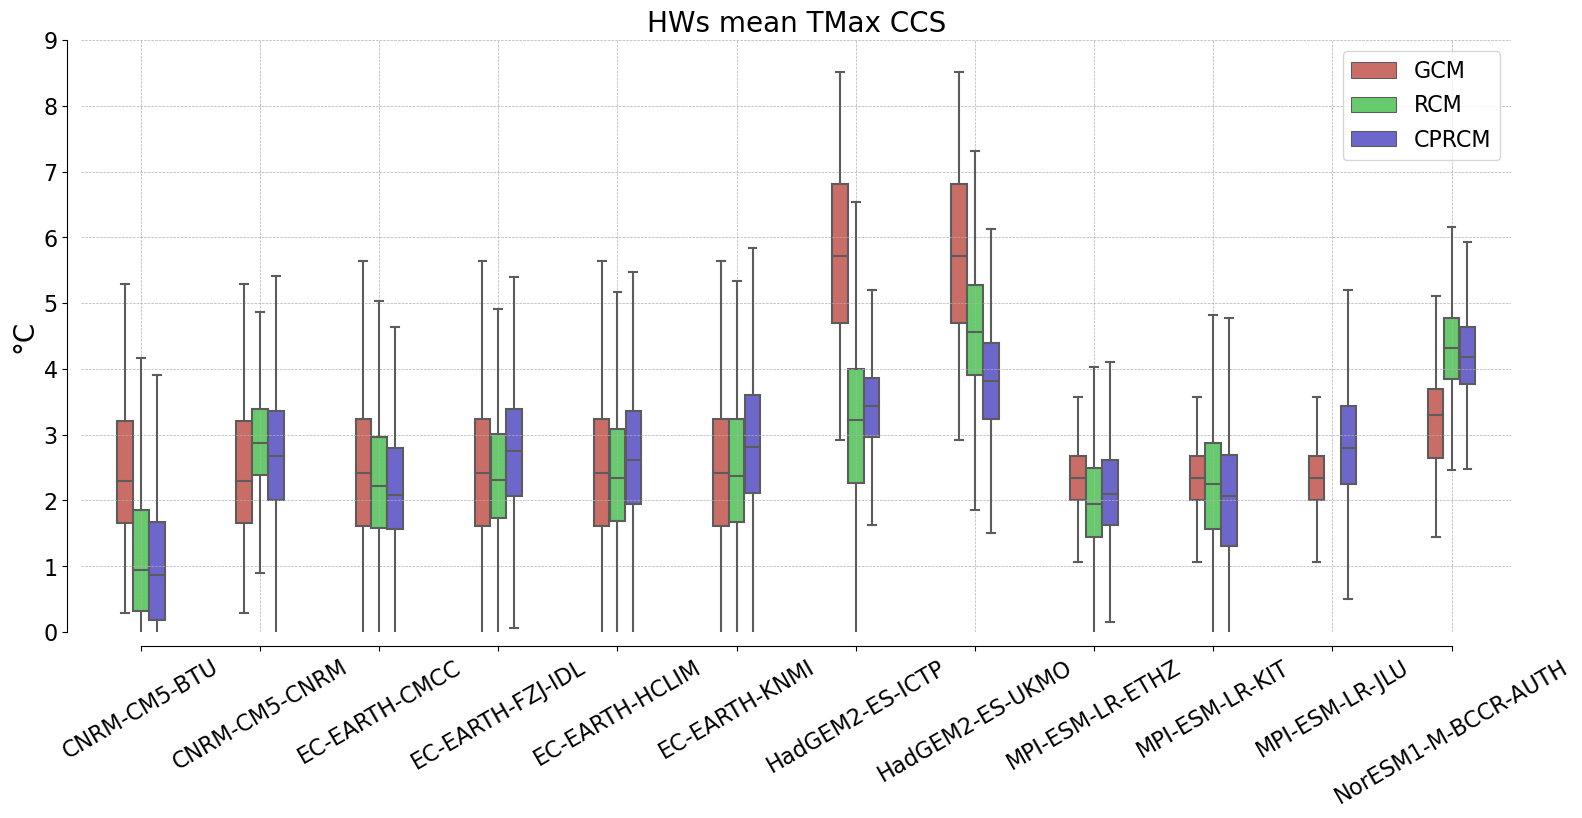

In [11]:
plt.close()
fig,ax0= plt.subplots(ncols=1,nrows=1,figsize=(16,8))

sns.boxplot(data=df_all_hw_tmax_mean,x="MODELS", y="CCS", hue='RES',width = .4,
               order= new_labels,
               fliersize=0,palette='hls',ax=ax0)     

W=0
ax0.set_title(f'{to_tit[W]}',fontsize=20)
ax0.set_ylabel(f'{ylabs[W]}',fontsize=20)
ax0.set_ylim([ymin[W],ymax[W]])
ax0.set_xlabel(f'')
ax0.set_xticklabels(new_labels)
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='x',rotation=30)

ax0.grid(True, which='both', linestyle='--', linewidth=0.5)
ax0.yaxis.set_major_locator(MultipleLocator(1))

plt.subplots_adjust(bottom=0.2)  # Adjust bottom as needed to prevent cut off

plt.legend(loc=1, fontsize=16)
sns.despine(offset=10, trim=True)
sns.despine(offset=10, trim=True)

plt.tight_layout()
plt.subplots_adjust(top=0.96, bottom=0.22)

plt.savefig(f'./figures/BOXPLOT_{to_save[W]}.png',dpi=300)



### HW max tmax 

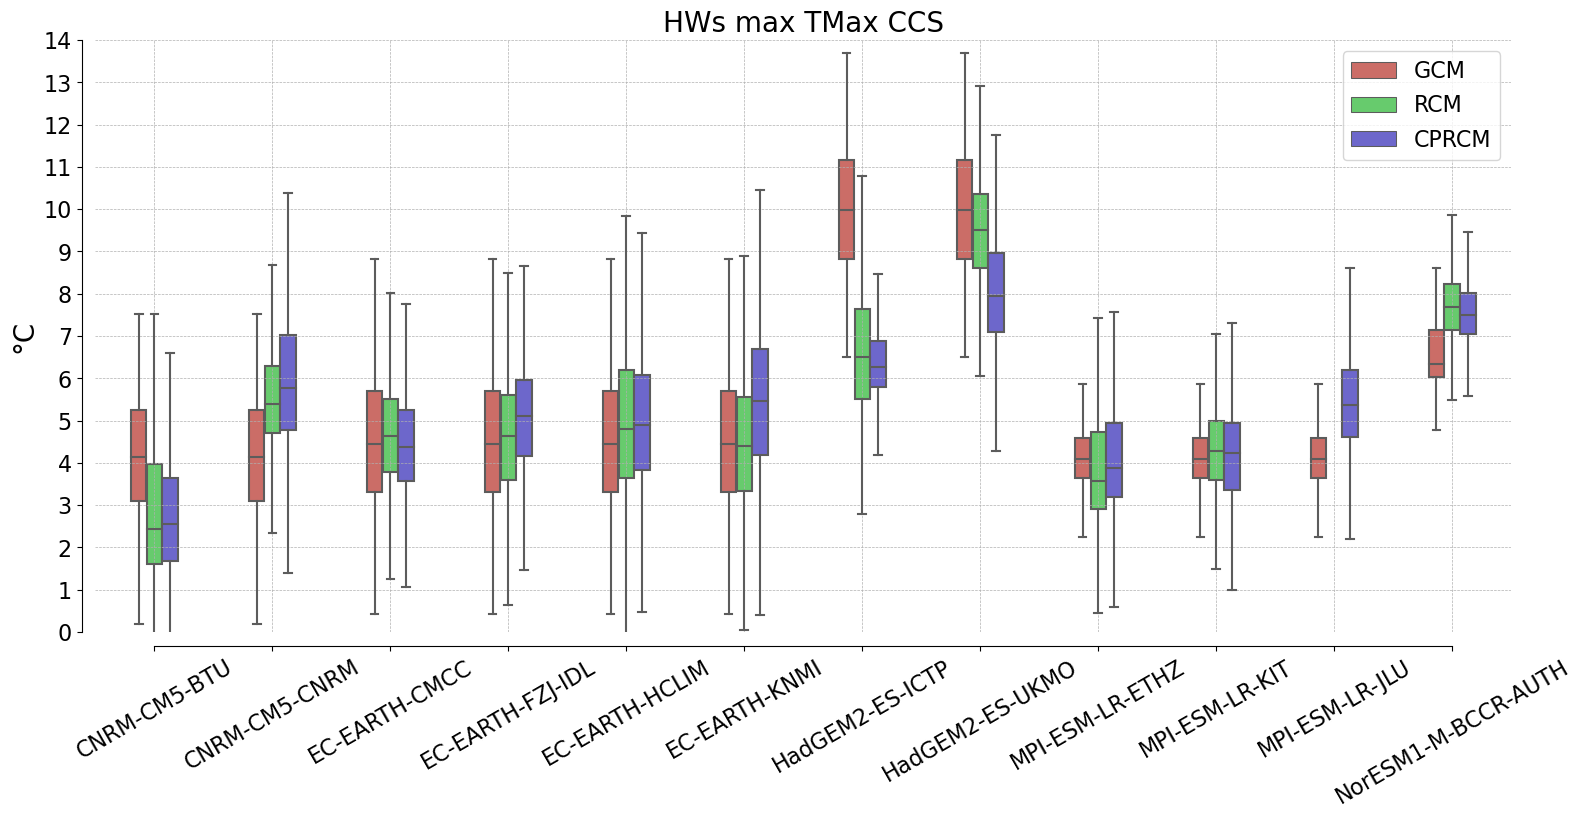

In [12]:
plt.close()
fig,ax0= plt.subplots(ncols=1,nrows=1,figsize=(16,8))

sns.boxplot(data=df_all_hw_tmax_max,x="MODELS", y="CCS", hue='RES',width = .4,
               order= new_labels,
               fliersize=0,palette='hls',ax=ax0)     

W=1
ax0.set_title(f'{to_tit[W]}',fontsize=20)
ax0.set_ylabel(f'{ylabs[W]}',fontsize=20)
ax0.set_ylim([ymin[W],ymax[W]])
ax0.set_xlabel(f'')
ax0.set_xticklabels(new_labels)
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='x',rotation=30)

ax0.grid(True, which='both', linestyle='--', linewidth=0.5)
ax0.yaxis.set_major_locator(MultipleLocator(1))

plt.subplots_adjust(bottom=0.2)  # Adjust bottom as needed to prevent cut off

plt.legend(loc=1, fontsize=16)
sns.despine(offset=10, trim=True)
sns.despine(offset=10, trim=True)

plt.tight_layout()
plt.subplots_adjust(top=0.96, bottom=0.22)

plt.savefig(f'./figures/BOXPLOT_{to_save[W]}.png',dpi=300)

### Persistence

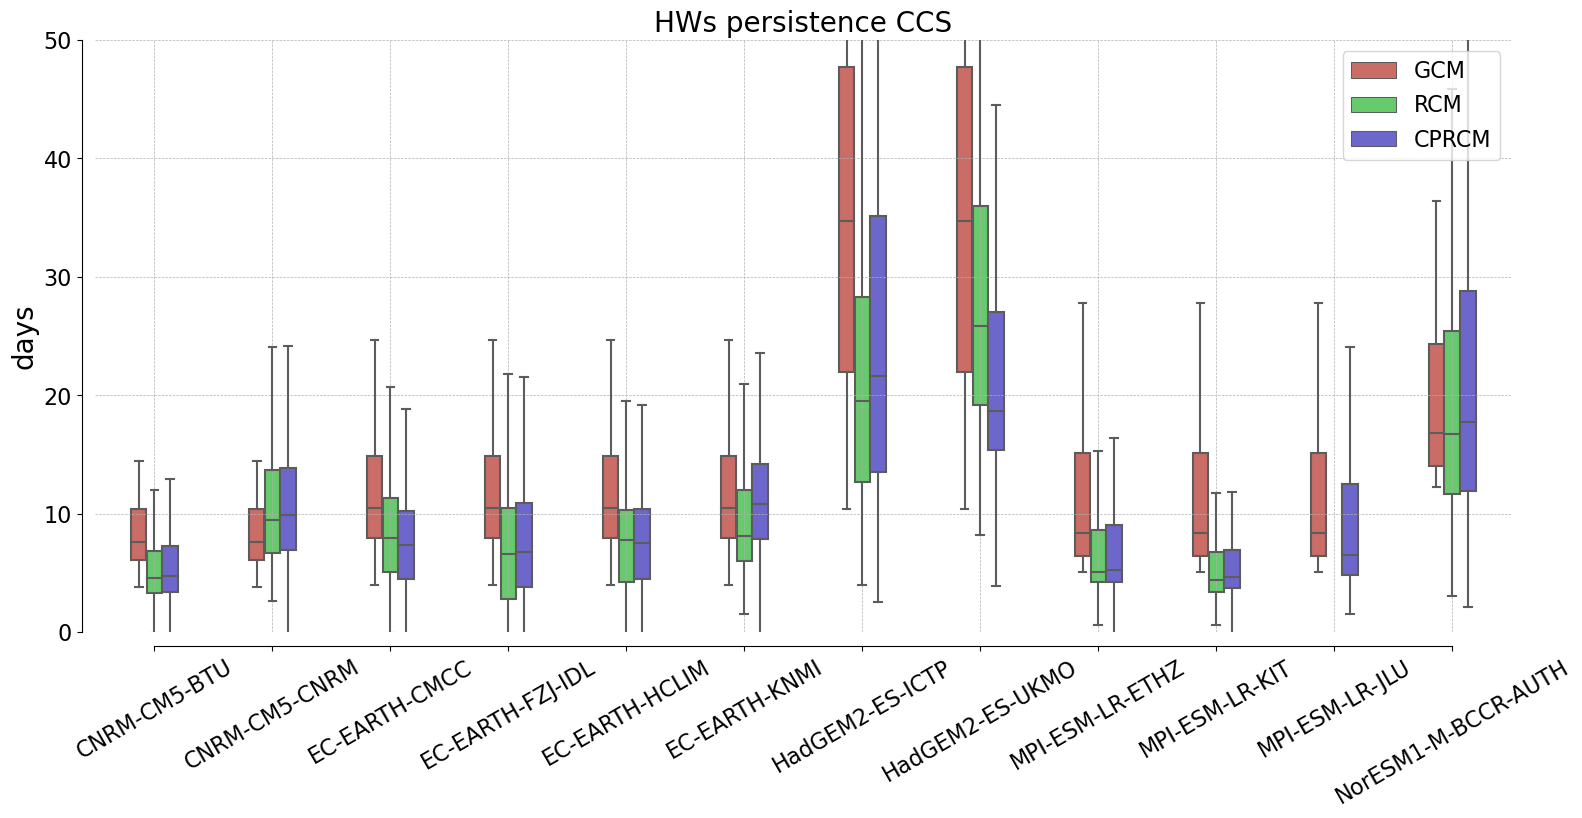

In [13]:
plt.close()
fig,ax0= plt.subplots(ncols=1,nrows=1,figsize=(16,8))

sns.boxplot(data=df_all_hw_persistence,x="MODELS", y="CCS", hue='RES',width = .4,
               order= new_labels,
               fliersize=0,palette='hls',ax=ax0)     

W=2
ax0.set_title(f'{to_tit[W]}',fontsize=20)
ax0.set_ylabel(f'{ylabs[W]}',fontsize=20)
ax0.set_ylim([ymin[W],ymax[W]])
ax0.set_xlabel(f'')
ax0.set_xticklabels(new_labels)
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='x',rotation=30)

ax0.grid(True, which='both', linestyle='--', linewidth=0.5)
ax0.yaxis.set_major_locator(MultipleLocator(10))

plt.subplots_adjust(bottom=0.2)  # Adjust bottom as needed to prevent cut off

plt.legend(loc=1, fontsize=16)
sns.despine(offset=10, trim=True)
sns.despine(offset=10, trim=True)

plt.tight_layout()
plt.subplots_adjust(top=0.96, bottom=0.22)

plt.savefig(f'./figures/BOXPLOT_{to_save[W]}.png',dpi=300)

### HWMId


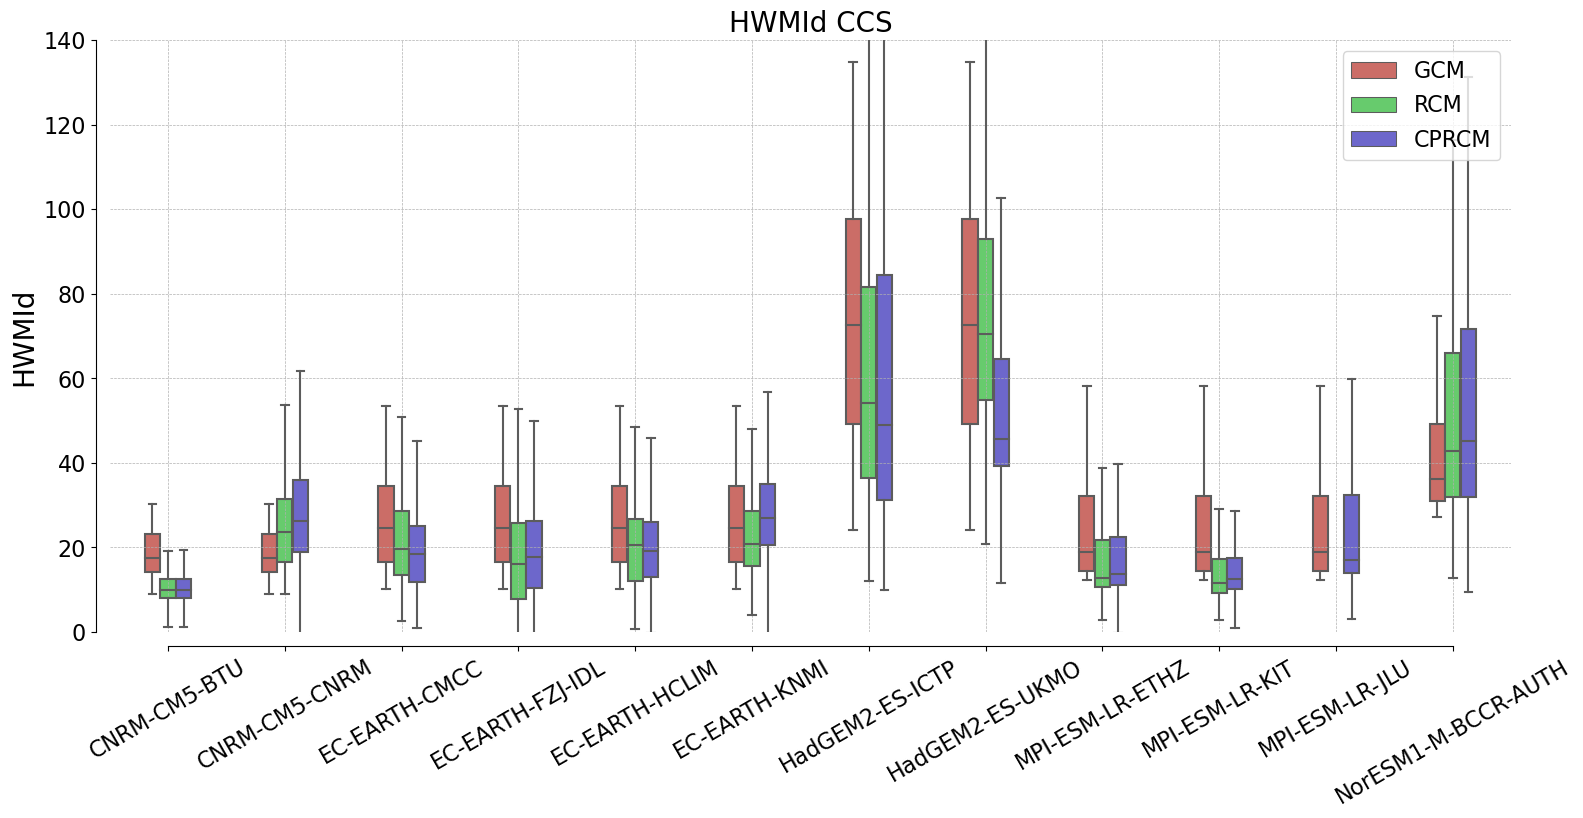

In [14]:
plt.close()
fig,ax0= plt.subplots(ncols=1,nrows=1,figsize=(16,8))

sns.boxplot(data=df_all_hwmid,x="MODELS", y="CCS", hue='RES',width = .4,
               order= new_labels,
               fliersize=0,
               palette="hls",ax=ax0)     

W=3
ax0.set_title(f'{to_tit[W]}',fontsize=20)
ax0.set_ylabel(f'{ylabs[W]}',fontsize=20)
ax0.set_ylim([ymin[W],ymax[W]])
ax0.set_xlabel(f'')
ax0.set_xticklabels(new_labels)
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='x',rotation=30)

ax0.grid(True, which='both', linestyle='--', linewidth=0.5)
ax0.yaxis.set_major_locator(MultipleLocator(20))

plt.subplots_adjust(bottom=0.2)  # Adjust bottom as needed to prevent cut off

plt.legend(loc=1, fontsize=16)
sns.despine(offset=10, trim=True)
sns.despine(offset=10, trim=True)

plt.tight_layout()
plt.subplots_adjust(top=0.96, bottom=0.22)

plt.savefig(f'./figures/BOXPLOT_{to_save[W]}.png',dpi=300)

### HW number

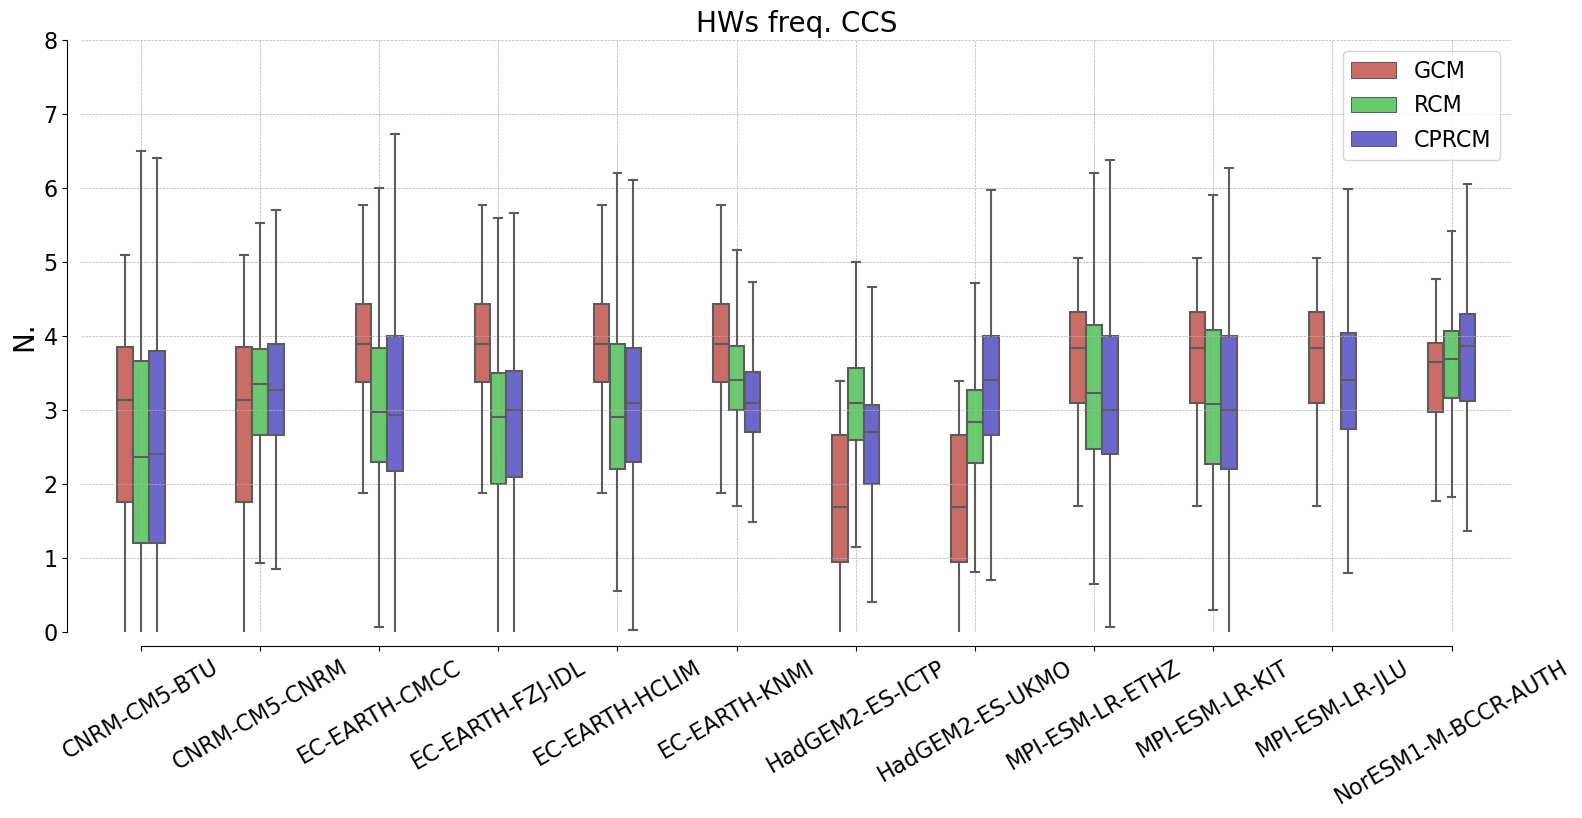

In [17]:
W=4

plt.close()
fig,ax0= plt.subplots(ncols=1,nrows=1,figsize=(16,8))

sns.boxplot(data=df_all_number, x="MODELS", y="CCS", hue='RES',width = .4,
               order= new_labels,
               fliersize=0,palette='hls',ax=ax0)     

ax0.set_title(f'{to_tit[W]}',fontsize=20)
ax0.set_ylabel(f'{ylabs[W]}',fontsize=20)
ax0.set_ylim([ymin[W],ymax[W]])
ax0.set_xlabel(f'')
ax0.set_xticklabels(new_labels)
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='x',rotation=30)

ax0.grid(True, which='both', linestyle='--', linewidth=0.5)
ax0.yaxis.set_major_locator(MultipleLocator(1))

plt.subplots_adjust(bottom=0.2)  # Adjust bottom as needed to prevent cut off

plt.legend(loc=1, fontsize=16)
sns.despine(offset=10, trim=True)
sns.despine(offset=10, trim=True)

plt.tight_layout()
plt.subplots_adjust(top=0.96, bottom=0.22)

plt.savefig(f'./figures/BOXPLOT_{to_save[W]}.png',dpi=300)

#### 